In [ ]:
# !pip install transformers --upgrade --q
# !pip install accelerate --q
# !pip install datasets --q

In [1]:
import time
start_time = time.time()
start_time

1682931419.0999835

In [2]:
!pip install country_converter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import country_converter as coco
import plotly.express as px

In [4]:
!pip install scikit-surprise


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import pandas as pd
from collections import defaultdict

In [6]:
base_path = "data"

train = pd.read_csv(f'{base_path}/train.csv')
test = pd.read_csv(f'{base_path}/test.csv')
submission = pd.read_csv(f'{base_path}/sample_submission.csv')

train.shape, test.shape, submission.shape

((871393, 10), (159621, 9), (159621, 2))

* ID : 샘플 고유 ID
* User-ID : 유저 고유 ID
* Book-ID : 도서 고유 ID
* 유저 정보
* Age : 나이
* Location : 지역
* 도서 정보
* Book-Title : 도서 명
* Book-Author : 도서 저자
* Year-Of-Publication : 도서 출판 년도 (-1일 경우 결측 혹은 알 수 없음):
* Publisher : 출판사
* Book-Rating : 유저가 도서에 부여한 평점 (0점 ~ 10점)

In [12]:
train.head()

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,TRAIN_000000,USER_00000,BOOK_044368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
2,TRAIN_000002,USER_00000,BOOK_086781,0,23.0,"sackville, new brunswick, canada",Waverley (Penguin English Library),Walter Scott,1981.0,Penguin Books
3,TRAIN_000003,USER_00000,BOOK_098622,0,23.0,"sackville, new brunswick, canada",Mother Earth Father Sky,Sue Harrison,1991.0,Avon
4,TRAIN_000004,USER_00000,BOOK_180810,8,23.0,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989.0,Signet Book


In [13]:
test.head()

,ID,User-ID,Book-ID,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,TEST_000000,USER_00008,BOOK_047966,37.0,"vermilion, ohio, usa",Birds of Prey: A Novel of Suspense,J.A. Jance,2002.0,Avon
1,TEST_000001,USER_00008,BOOK_119494,37.0,"vermilion, ohio, usa",Midnight Voices,JOHN SAUL,2003.0,Ballantine Books
2,TEST_000002,USER_00008,BOOK_151775,37.0,"vermilion, ohio, usa",Breaking Free : A Prescription for Personal an...,David M. Noer,1996.0,Jossey-Bass
3,TEST_000003,USER_00008,BOOK_176255,37.0,"vermilion, ohio, usa",Bitter Harvest,Ann Rule,1999.0,Pocket
4,TEST_000004,USER_00008,BOOK_187307,37.0,"vermilion, ohio, usa",Embraced by the Light,Betty J. Eadie,1994.0,Bantam Books


In [14]:
train.isnull().sum()

ID                     0
User-ID                0
Book-ID                0
Book-Rating            0
Age                    0
Location               0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871393 entries, 0 to 871392
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   871393 non-null  object 
 1   User-ID              871393 non-null  object 
 2   Book-ID              871393 non-null  object 
 3   Book-Rating          871393 non-null  int64  
 4   Age                  871393 non-null  float64
 5   Location             871393 non-null  object 
 6   Book-Title           871393 non-null  object 
 7   Book-Author          871393 non-null  object 
 8   Year-Of-Publication  871393 non-null  float64
 9   Publisher            871393 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 66.5+ MB


In [16]:
train.isnull().sum().sum()

0

In [17]:
test.isnull().sum().sum()

0

In [18]:
train.dropna(inplace=True)

In [19]:
train.isnull().sum()

ID                     0
User-ID                0
Book-ID                0
Book-Rating            0
Age                    0
Location               0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [20]:
train['Age'] = train['Age'].astype(int)
train['Year-Of-Publication'] = train['Year-Of-Publication'].astype(int)

<Axes: >

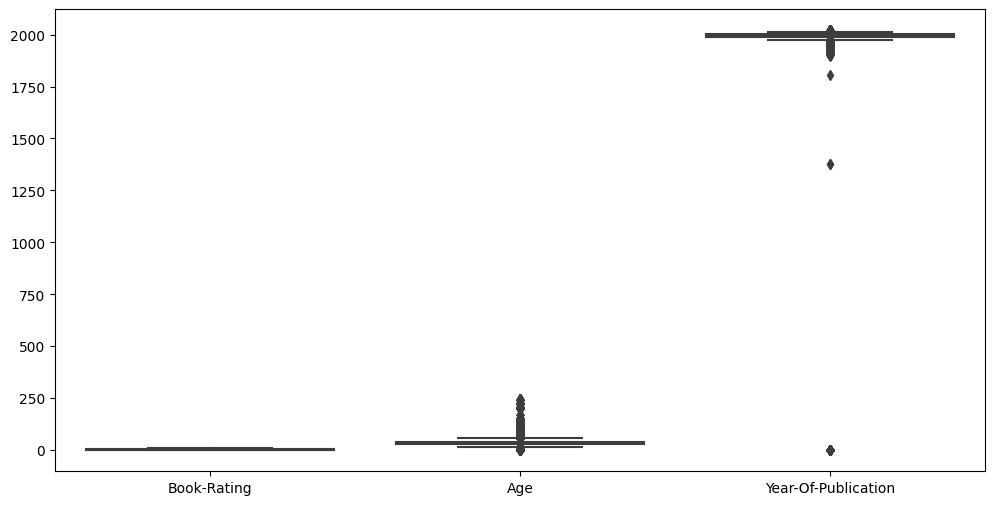

In [21]:
fig,ax = plt.subplots(figsize=(12,6))
sns.boxplot(data=train)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871393 entries, 0 to 871392
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   871393 non-null  object
 1   User-ID              871393 non-null  object
 2   Book-ID              871393 non-null  object
 3   Book-Rating          871393 non-null  int64 
 4   Age                  871393 non-null  int64 
 5   Location             871393 non-null  object
 6   Book-Title           871393 non-null  object
 7   Book-Author          871393 non-null  object
 8   Year-Of-Publication  871393 non-null  int64 
 9   Publisher            871393 non-null  object
dtypes: int64(3), object(7)
memory usage: 66.5+ MB


# EDA

나이별 분포

In [23]:
max_age = train['Age'].max() # Age 열의 최대값 찾기
min_age = train['Age'].min() # Age 열의 최소값 찾기

print('Maximum Age:', max_age)
print('Minimum Age:', min_age)

Maximum Age: 244
Minimum Age: 0


In [24]:
iid = 244
train[train["Age"] == iid]

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
604950,TRAIN_604950,USER_63071,BOOK_055682,8,244,"stuttgart, baden-wuerttemberg, germany",Die Entdeckung der Currywurst.,Uwe Timm,2000,Dtv
604951,TRAIN_604951,USER_63071,BOOK_096177,0,244,"stuttgart, baden-wuerttemberg, germany",Das Blutgericht.,Kari KÃ?Â¶ster-LÃ?Â¶sche,2003,ECON-Taschenbuchverlag
604952,TRAIN_604952,USER_63071,BOOK_148270,0,244,"stuttgart, baden-wuerttemberg, germany",Dies Ist Nicht Mein Land,Fleischmann,-1,Wilhelm Heyne Verlag GmbH &amp; Co KG
604953,TRAIN_604953,USER_63071,BOOK_152432,0,244,"stuttgart, baden-wuerttemberg, germany",Wer Dornen sÃ?Â¤t.,Rebecca Ryman,2000,"Fischer (Tb.), Frankfurt"
604954,TRAIN_604954,USER_63071,BOOK_245261,8,244,"stuttgart, baden-wuerttemberg, germany",Who Put the Pizza in the Vcr: Laughing Your Wa...,Martha Bolton,1996,Gospel Light Pubns
604955,TRAIN_604955,USER_63071,BOOK_254526,0,244,"stuttgart, baden-wuerttemberg, germany",Die Tote im falschen Grab.,Ruth Rendell,2000,Goldmann
604956,TRAIN_604956,USER_63071,BOOK_266466,6,244,"stuttgart, baden-wuerttemberg, germany",Topkapi.,Eric Ambler,1978,Diogenes Verlag


In [25]:
train['Age'] = np.where(train['Age'] == 0, 15, np.where(train['Age'] >= 80, 80, train['Age']))
test['Age'] = np.where(test['Age'] == 0, 15, np.where(test['Age'] >= 80, 80, test['Age']))
train['Year-Of-Publication'] = np.where(train['Year-Of-Publication'] == -1, 1997, train['Year-Of-Publication'])
test['Year-Of-Publication'] = np.where(test['Year-Of-Publication'] == -1, 1997, test['Year-Of-Publication'])

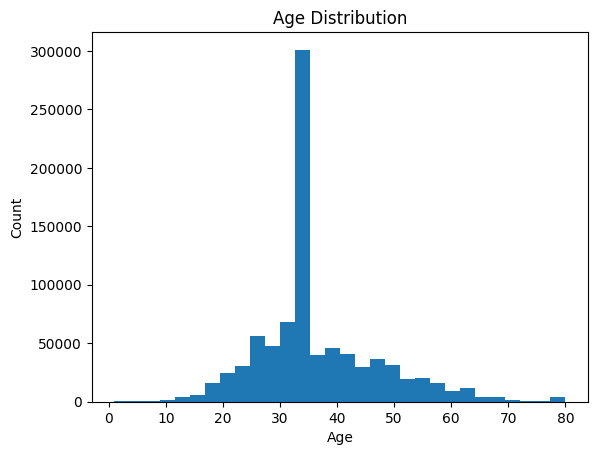

In [38]:
train['Age'].plot.hist(bins=30) # 히스토그램 그리기
plt.title('Age Distribution') # 그래프 제목 설정
plt.xlabel('Age') # x축 레이블 설정
plt.ylabel('Count') # y축 레이블 설정
plt.show() # 그래프 보이기

출판연도별 분포

<ipython-input-40-f7716ac3284c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Year-Of-Publication'], kde=False, bins=50)


<Axes: xlabel='Year-Of-Publication'>

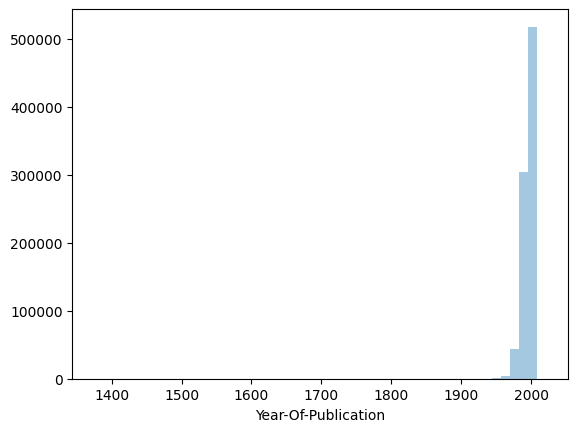

In [40]:
sns.distplot(train['Year-Of-Publication'], kde=False, bins=50)

<ipython-input-41-0bd63cb06207>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, annot_kws={'size': 20}) #annot 크기 조정


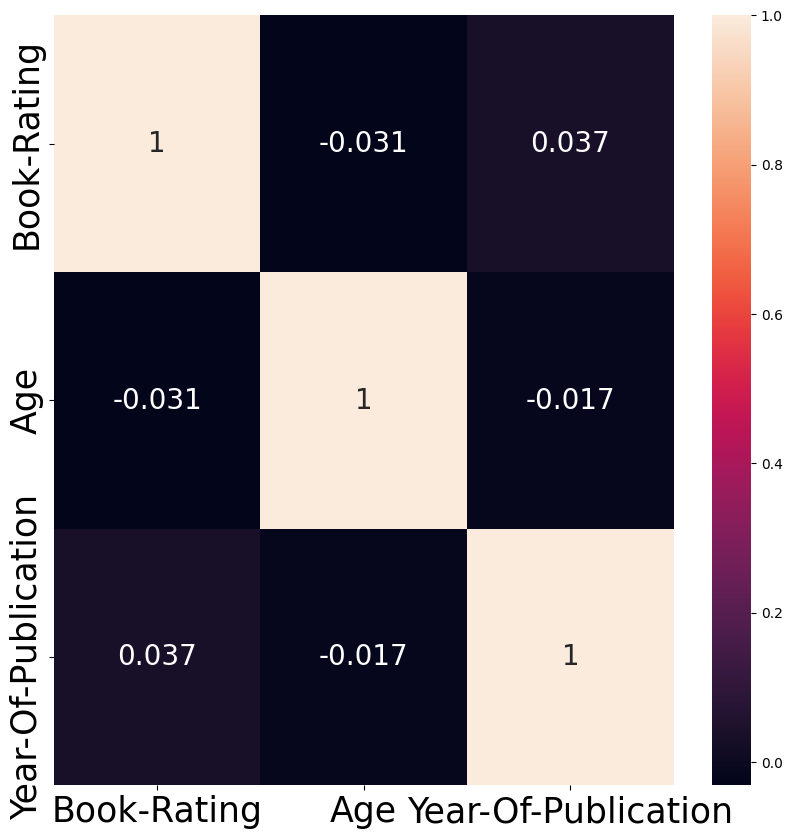

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True, annot_kws={'size': 20}) #annot 크기 조정
plt.tick_params(labelsize=25)

In [42]:
train

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,TRAIN_000000,USER_00000,BOOK_044368,8,23,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001,Mira
1,TRAIN_000001,USER_00000,BOOK_081205,8,23,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981,Penguin Books
2,TRAIN_000002,USER_00000,BOOK_086781,0,23,"sackville, new brunswick, canada",Waverley (Penguin English Library),Walter Scott,1981,Penguin Books
3,TRAIN_000003,USER_00000,BOOK_098622,0,23,"sackville, new brunswick, canada",Mother Earth Father Sky,Sue Harrison,1991,Avon
4,TRAIN_000004,USER_00000,BOOK_180810,8,23,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989,Signet Book
...,...,...,...,...,...,...,...,...,...,...
871388,TRAIN_871388,USER_92096,BOOK_081138,0,34,"minneapolis, minnesota, usa",Healing Words: The Power of Prayer and the Pra...,Larry Dossey,1993,Harpercollins
871389,TRAIN_871389,USER_92097,BOOK_258124,0,35,"temple, texas, usa",The Salmon of Doubt: Hitchhiking the Galaxy On...,DOUGLAS ADAMS,2002,Harmony
871390,TRAIN_871390,USER_92098,BOOK_071848,0,45,"ottawa, ontario, canada",Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2000,Thorndike Press
871391,TRAIN_871391,USER_92099,BOOK_252599,8,43,"maple grove, minnesota, usa",Heartbreak Hill: Anatomy of a Ryder Cup,Tim Rosaforte,1996,St Martins Pr


In [27]:
def count_null_values(df, dataset_name):
    
    num_of_total_null_values = sum(df.isnull().sum().values)
    print(f"{dataset_name} dataset has {num_of_total_null_values} null values")
    return num_of_total_null_values

In [28]:
# Location 변수에서 "vermilion", "ohio", "usa" 추출하여 새로운 변수 생성
new_train = train.copy()
# new_trains = count_null_values(new_train, "")
# new_train['City'] = train['Location'].str.split(', ').str[0]
# new_train['State'] = train['Location'].str.split(', ').str[1]
# new_train['Country'] = train['Location'].str.split(', ').str[-1]
countries = []
cond = new_train['Location'].str.split(',')

for cont in cond:
    
    countries.append(cont[-1].strip().title())

In [29]:
new_train["Country"] = countries
new_train.head()

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher,Country
0,TRAIN_000000,USER_00000,BOOK_044368,8,23,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001,Mira,Canada
1,TRAIN_000001,USER_00000,BOOK_081205,8,23,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981,Penguin Books,Canada
2,TRAIN_000002,USER_00000,BOOK_086781,0,23,"sackville, new brunswick, canada",Waverley (Penguin English Library),Walter Scott,1981,Penguin Books,Canada
3,TRAIN_000003,USER_00000,BOOK_098622,0,23,"sackville, new brunswick, canada",Mother Earth Father Sky,Sue Harrison,1991,Avon,Canada
4,TRAIN_000004,USER_00000,BOOK_180810,8,23,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989,Signet Book,Canada


In [30]:
new_train.loc[new_train["Country"] == "Usa", "Country"] = "United States"
new_train.loc[new_train["Country"] == "España", "Country"] = "Spain"
new_train.loc[new_train["Country"] == "England", "Country"] = "United Kingdom"
new_train.loc[new_train["Country"] == "Trinidad And Tobago", "Country"] = "Trinidad and Tobago"
new_train.loc[new_train["Country"] == "Deutschland", "Country"] = "Germany"
new_train.loc[new_train["Country"] == "Tanzania", "Country"] = "Tanzania, United Republic of"
new_train.loc[new_train["Country"] == "Moldova", "Country"] = "Moldova, Republic of"
new_train.loc[new_train["Country"] == "Czech Republic", "Country"] = "Czechia"
new_train.loc[new_train["Country"] == "South Korea", "Country"] = "Korea, Republic of"
new_train.loc[new_train["Country"] == "Venezuela", "Country"] = "Venezuela, Bolivarian Republic of"
new_train.loc[new_train["Country"] == "Galiza", "Country"] = "Spain"
new_train.loc[new_train["Country"] == "Taiwan", "Country"] = "Taiwan, Province of China"
new_train.loc[new_train["Country"] == "Scotland", "Country"] = "United Kingdom"
new_train.loc[new_train["Country"] == "Bolivia", "Country"] = "Bolivia, Plurinational State of"
new_train.loc[new_train["Country"] == "Iran", "Country"] = "Iran, Islamic Republic of"
new_train.loc[new_train["Country"] == "United Sates", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Maricopa", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Galiza Neghra", "Country"] = "Spain"
new_train.loc[new_train["Country"] == "Richmond Country", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Catalunya", "Country"] = "Spain"
new_train.loc[new_train["Country"] == "Vietnam", "Country"] = "Viet Nam"
new_train.loc[new_train["Country"] == "La Chine Éternelle", "Country"] = "China"
new_train.loc[new_train["Country"] == "Lleida", "Country"] = "Spain"
new_train.loc[new_train["Country"] == "La Chine Éternelle !", "Country"] = "China"
new_train.loc[new_train["Country"] == "La Chine Éternelle!", "Country"] = "China"
new_train.loc[new_train["Country"] == "Framingham", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Usa (Currently Living In England)", "Country"] = "United Kingdom"
new_train.loc[new_train["Country"] == "Alderney", "Country"] = "United Kingdom"
new_train.loc[new_train["Country"] == "Saint Loius", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Laos", "Country"] = "LA"
new_train.loc[new_train["Country"] == "Collin", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Burma", "Country"] = "Myanmar"
new_train.loc[new_train["Country"] == "Shelby", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Worcester", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Los Estados Unidos De Norte America", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Russia", "Country"] = "Russian Federation"
new_train.loc[new_train["Country"] == "Polk", "Country"] = "United States"
new_train.loc[new_train["Country"] == "U.A.E", "Country"] = "United Arab Emirates"
new_train.loc[new_train["Country"] == "U.S.A.", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Cherokee", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Cananda", "Country"] = "Canada"
new_train.loc[new_train["Country"] == "Morgan", "Country"] = "France"
new_train.loc[new_train["Country"] == "Cape Verde", "Country"] = "Cabo Verde"
new_train.loc[new_train["Country"] == "Antigua And Barbuda", "Country"] = "Antigua and Barbuda"
new_train.loc[new_train["Country"] == "Us", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Euskal Herria", "Country"] = "Spain"
new_train.loc[new_train["Country"] == "Bosnia And Herzegovina", "Country"] = "Bosnia and Herzegovina"
new_train.loc[new_train["Country"] == "Ventura County", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Csa", "Country"] = "Canada"
new_train.loc[new_train["Country"] == "Hernando", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Prince William", "Country"] = "United Kingdom"
new_train.loc[new_train["Country"] == "Onondaga Nation", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Tobago", "Country"] = "Trinidad and Tobago"
new_train.loc[new_train["Country"] == "Catalonia", "Country"] = "Spain"
new_train.loc[new_train["Country"] == "Urugua", "Country"] = "Uruguay"
new_train.loc[new_train["Country"] == "Phillipines", "Country"] = "Philippines"
new_train.loc[new_train["Country"] == "San Mateo", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Nz", "Country"] = "New Zealand"
new_train.loc[new_train["Country"] == "Italia", "Country"] = "Italy"
new_train.loc[new_train["Country"] == "Berguedà", "Country"] = "Spain"
new_train.loc[new_train["Country"] == "Ferrara", "Country"] = "Italy"
new_train.loc[new_train["Country"] == "L`Italia", "Country"] = "Italy"
new_train.loc[new_train["Country"] == "Wales", "Country"] = "United Kingdom"
new_train.loc[new_train["Country"] == "Macau", "Country"] = "China"
new_train.loc[new_train["Country"] == "Macedonia", "Country"] = "North Macedonia"
new_train.loc[new_train["Country"] == "Channel Islands", "Country"] = "United Kingdom"
new_train.loc[new_train["Country"] == "United Kindgonm", "Country"] = "United Kingdom"
new_train.loc[new_train["Country"] == "Brunei", "Country"] = "Brunei Darussalam"
new_train.loc[new_train["Country"] == "K1C7B1", "Country"] = "Canada"
new_train.loc[new_train["Country"] == "St.Thomasi", "Country"] = "Canada"
new_train.loc[new_train["Country"] == "Catalunya Spain", "Country"] = "Spain"
new_train.loc[new_train["Country"] == "La Belgique", "Country"] = "Belgium"
new_train.loc[new_train["Country"] == "Aroostook", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Rutherford", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Fort Bend", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Syria", "Country"] = "Syrian Arab Republic"
new_train.loc[new_train["Country"] == "U.K.", "Country"] = "United Kingdom"
new_train.loc[new_train["Country"] == "Madrid", "Country"] = "Spain"
new_train.loc[new_train["Country"] == "Orense", "Country"] = "Spain"
new_train.loc[new_train["Country"] == "St. Helena", "Country"] = "United Kingdom"
new_train.loc[new_train["Country"] == "La France", "Country"] = "France"
new_train.loc[new_train["Country"] == "U.S. Of A.", "Country"] = "United States"
new_train.loc[new_train["Country"] == "United Staes", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Ee.Uu", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Alachua", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Burlington", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Van Wert", "Country"] = "United States"
new_train.loc[new_train["Country"] == "Camden", "Country"] = "United Kingdom"
new_train.loc[new_train["Country"] == "U.S>", "Country"] = "United States"
new_train.loc[new_train["Country"] == "America", "Country"] = "United States"
new_train.loc[new_train["Country"] == "United State", "Country"] = "United States"

In [31]:
new_train

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher,Country
0,TRAIN_000000,USER_00000,BOOK_044368,8,23,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001,Mira,Canada
1,TRAIN_000001,USER_00000,BOOK_081205,8,23,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981,Penguin Books,Canada
2,TRAIN_000002,USER_00000,BOOK_086781,0,23,"sackville, new brunswick, canada",Waverley (Penguin English Library),Walter Scott,1981,Penguin Books,Canada
3,TRAIN_000003,USER_00000,BOOK_098622,0,23,"sackville, new brunswick, canada",Mother Earth Father Sky,Sue Harrison,1991,Avon,Canada
4,TRAIN_000004,USER_00000,BOOK_180810,8,23,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989,Signet Book,Canada
...,...,...,...,...,...,...,...,...,...,...,...
871388,TRAIN_871388,USER_92096,BOOK_081138,0,34,"minneapolis, minnesota, usa",Healing Words: The Power of Prayer and the Pra...,Larry Dossey,1993,Harpercollins,United States
871389,TRAIN_871389,USER_92097,BOOK_258124,0,35,"temple, texas, usa",The Salmon of Doubt: Hitchhiking the Galaxy On...,DOUGLAS ADAMS,2002,Harmony,United States
871390,TRAIN_871390,USER_92098,BOOK_071848,0,45,"ottawa, ontario, canada",Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2000,Thorndike Press,Canada
871391,TRAIN_871391,USER_92099,BOOK_252599,8,43,"maple grove, minnesota, usa",Heartbreak Hill: Anatomy of a Ryder Cup,Tim Rosaforte,1996,St Martins Pr,United States


In [32]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
import pycountry

countries = [country.name for country in pycountry.countries]

In [34]:
country_values = new_train["Country"].unique()

In [35]:
import pycountry

country = pycountry.countries.lookup('BE')
print(country.name)


Belgium


In [36]:
invalid_countries = []

for country in country_values:
    if country not in countries:
        print(f"Invalid country name: {country}")
        invalid_countries.append(country)


Invalid country name: 
Invalid country name: Petrolwar Nation
Invalid country name: The World Tomorrow
Invalid country name: Universe
Invalid country name: LA
Invalid country name: N/A
Invalid country name: Tdzimi
Invalid country name: Space
Invalid country name: Here And There
Invalid country name: Pender
Invalid country name: Yugoslavia
Invalid country name: X
Invalid country name: Kern
Invalid country name: We`Re Global!
Invalid country name: Disgruntled States Of America
Invalid country name: Unknown
Invalid country name: Ysa
Invalid country name: N/A - On The Road
Invalid country name: The Great White North
Invalid country name: Caribbean Sea
Invalid country name: "N/A"
Invalid country name: The
Invalid country name: Far Away...
Invalid country name: Quit
Invalid country name: Hungary And Usa
Invalid country name: C
Invalid country name: Everywhere And Anywhere


In [37]:
for country in invalid_countries:
    new_train = new_train[new_train['Country'] != country]

In [38]:
converted_country=coco.convert(names=new_train["Country"], to="ISO3")
new_train["Country"]=converted_country

In [39]:
new_train['Country'].value_counts().reset_index().head(10)

,index,Country
0,USA,630647
1,CAN,78576
2,GBR,27202
3,DEU,23481
4,AUS,15270
5,ESP,12638
6,FRA,8969
7,PRT,5974
8,NZL,4691
9,MYS,4551


In [40]:
country=new_train["Country"].value_counts()
fig=px.choropleth(locations=country.index,
                  color=country.values,
                  color_continuous_scale=px.colors.sequential.dense,
                  template='plotly_dark',
                  title='Distribution of users by countries')

fig.update_layout(font=dict(size=17, family="Franklin Gothic"))
fig.show()

# 나라별 평균 평점
- 나라이름을 똑바로 입력하지 않은사람이 있어 데이터 전처리 진행중

In [41]:
book_count = new_train.groupby('Book-ID')['Book-Rating'].count().reset_index(name='Count')
book_rating = new_train.groupby('Book-ID')['Book-Rating'].mean().reset_index(name='Avg-Rating')
book = pd.merge(book_count, book_rating, on='Book-ID')
book['Rating-Per-Count'] = book['Avg-Rating'] / book['Count']
country_rating = new_train.merge(book, on='Book-ID').groupby('Country')['Rating-Per-Count'].mean()
country_rating = country_rating.sort_values(ascending=False).head(10)

https://ko.wikipedia.org/wiki/채널_제도
https://www.google.com/search?q=the+disgruntled+states+of+america&client=safari&rls=en&sxsrf=APwXEdcXMjsuSdftxaOJ07myt9F-5iBC4g%3A1682855091415&ei=s1ROZMqFGZH3hwPe3YDACg&oq=disgruntled+states&gs_lcp=Cgxnd3Mtd2l6LXNlcnAQAxgAMgYIABAFEB46BwgjEOoCECc6DQguEIAEEMcBENEDEAo6BQgAEIAEOgsIABCABBCxAxCDAToICAAQgAQQsQM6CwguEIAEEMcBENEDOg0IABCABBCxAxCDARAKOgcIABCABBAKOhsILhCABBDHARDRAxAKEJcFENwEEN4EEOAEGAE6BwgAEIoFEEM6BwguEIoFEEM6CAguEIAEELEDOhAILhCKBRDHARDRAxDUAhBDOhEILhCABBCxAxCDARDHARDRAzoKCAAQgAQQRhD_AToFCC4QgAQ6BAgAEB46BwgAEBMQgAQ6BggAEB4QEzoICAAQHhAPEBM6CAgAEAUQHhATOgYIABAeEAo6BggAEB4QDzoGCAAQCBAeSgQIQRgAUABY-5UBYKSjAWgEcAB4AIABogGIAY8PkgEEMC4xNJgBAKABAqABAbABCsABAdoBBggBEAEYFA&sclient=gws-wiz-serp

- UGA = 우간다
- GAB = 가봉
- LTU = 리투아니아
- GTM = 과테말라
- MUS = 모리셔스공화국
- VNM = 베트남
- BGD = 방글라데스
- GNB = 기니비사우
- AND = 안다우스
- BRN = 브루나이

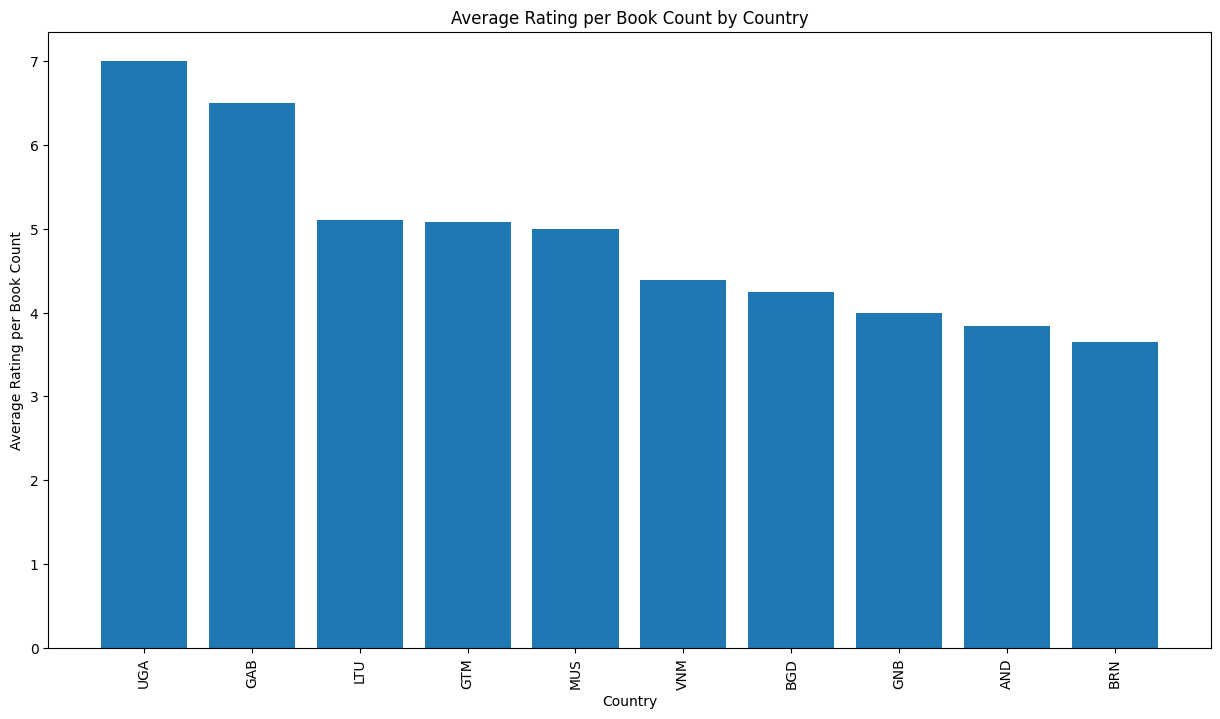

In [42]:
plt.figure(figsize=(15, 8))
plt.bar(country_rating.index, country_rating.values)
plt.xticks(rotation=90)
plt.title('Average Rating per Book Count by Country')
plt.xlabel('Country')
plt.ylabel('Average Rating per Book Count')
plt.show()

# 탑10 작가
- count값을 구한 거라 평점 수가 많은 작가 순

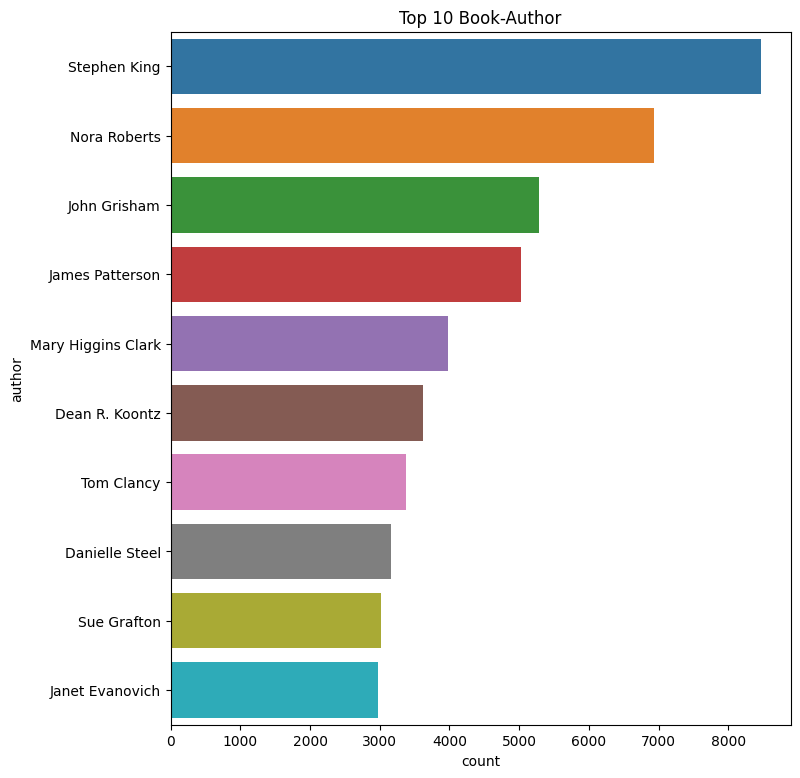

In [43]:
ds = train['Book-Author'].value_counts().reset_index()
ds.columns = ['author', 'count']
ds = ds.sort_values('count', ascending=False).head(10)

plt.figure(figsize=(8, 9))
sns.barplot(x='count', y='author', data=ds, orient='h')
plt.title('Top 10 Book-Author')
plt.show()

# 탑10 출판사별 평균 평점

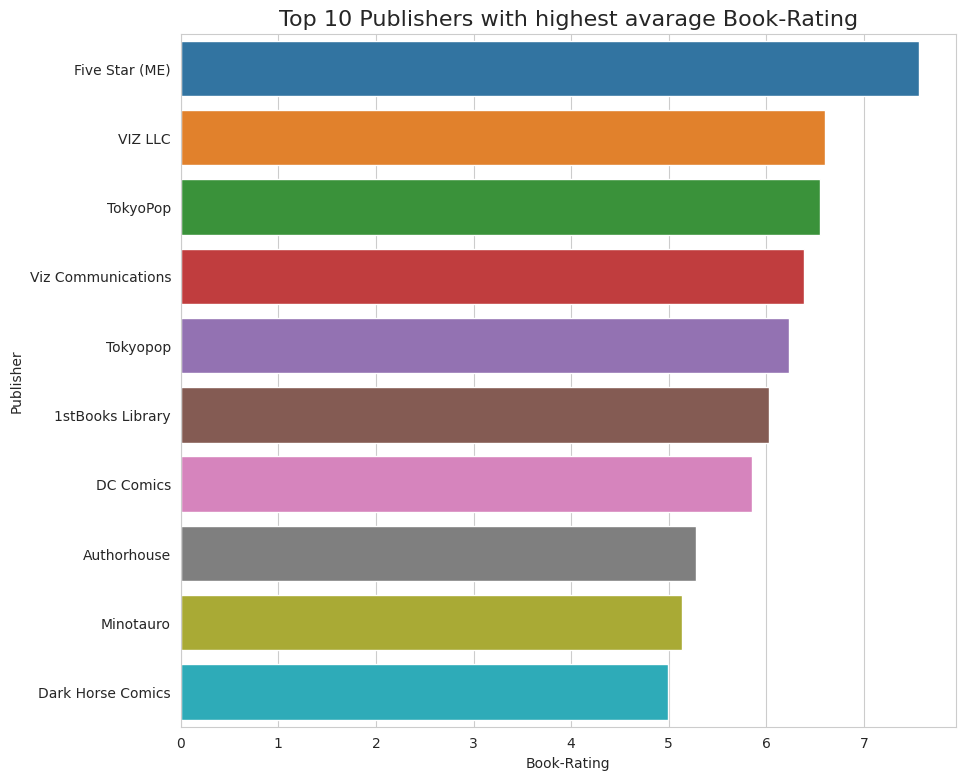

In [44]:
books = train['Publisher'].value_counts().reset_index()
books.columns = ['Publisher', 'Publisher_evaluation_count']
df = pd.merge(train, books)
mean_df = df[df['Publisher_evaluation_count']>100]
mean_df = mean_df.groupby('Publisher')['Book-Rating'].mean().reset_index().sort_values('Book-Rating', ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 9))
sns.barplot(x='Book-Rating', y='Publisher', data=mean_df.head(10), orient='h')
plt.title('Top 10 Publishers with highest avarage Book-Rating', fontsize=16)
plt.show()

# 탑10 작가별 평균 평점

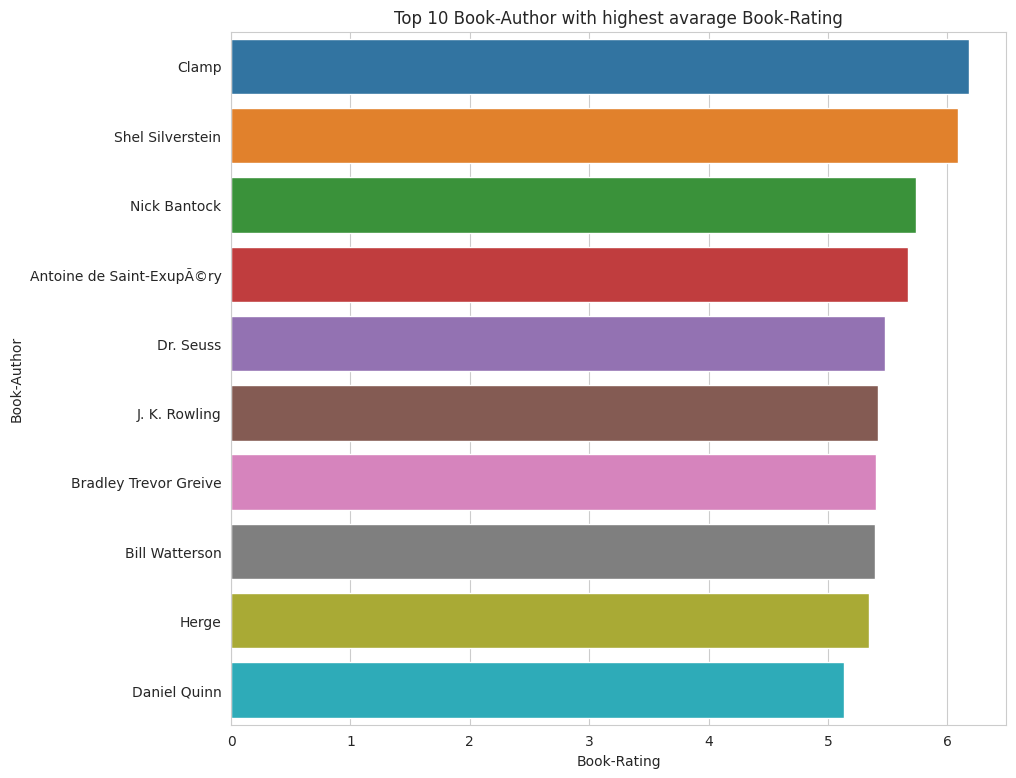

In [45]:
books = train['Book-Author'].value_counts().reset_index()
books.columns = ['Book-Author', 'author_evaluation_count']
df = pd.merge(train, books)

mean_df = df[df['author_evaluation_count']>100]
mean_df = mean_df.groupby('Book-Author')['Book-Rating'].mean().reset_index().sort_values('Book-Rating', ascending=False)

top_50_mean_df = mean_df.head(10)

plt.figure(figsize=(10,9))
sns.barplot(x='Book-Rating', y='Book-Author', data=top_50_mean_df, orient='h')
plt.title('Top 10 Book-Author with highest avarage Book-Rating')
plt.show()

In [46]:
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871393 entries, 0 to 871392
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   871393 non-null  object
 1   User-ID              871393 non-null  object
 2   Book-ID              871393 non-null  object
 3   Book-Rating          871393 non-null  int64 
 4   Age                  871393 non-null  int64 
 5   Location             871393 non-null  object
 6   Book-Title           871393 non-null  object
 7   Book-Author          871393 non-null  object
 8   Year-Of-Publication  871393 non-null  int64 
 9   Publisher            871393 non-null  object
dtypes: int64(3), object(7)
memory usage: 66.5+ MB


In [47]:
train["Location"] = train["Location"].str.title()

print(train)

                  ID     User-ID      Book-ID  Book-Rating  Age  \
0       TRAIN_000000  USER_00000  BOOK_044368            8   23   
1       TRAIN_000001  USER_00000  BOOK_081205            8   23   
2       TRAIN_000002  USER_00000  BOOK_086781            0   23   
3       TRAIN_000003  USER_00000  BOOK_098622            0   23   
4       TRAIN_000004  USER_00000  BOOK_180810            8   23   
...              ...         ...          ...          ...  ...   
871388  TRAIN_871388  USER_92096  BOOK_081138            0   34   
871389  TRAIN_871389  USER_92097  BOOK_258124            0   35   
871390  TRAIN_871390  USER_92098  BOOK_071848            0   45   
871391  TRAIN_871391  USER_92099  BOOK_252599            8   43   
871392  TRAIN_871392  USER_92100  BOOK_130798            0   35   

                                     Location  \
0            Sackville, New Brunswick, Canada   
1            Sackville, New Brunswick, Canada   
2            Sackville, New Brunswick, Canada   

In [64]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my-application/1.0", timeout=5)

In [65]:
from geopy.exc import GeocoderTimedOut

def get_lat_long(location):
    geolocator = Nominatim(user_agent="my-application/1.0")
    try:
        location = geolocator.geocode(location)
        return (location.latitude, location.longitude)
    except GeocoderTimedOut:
        return get_lat_long(location)

In [ ]:
import time

latitudes = []
longitudes = []

for i, location_str in enumerate(train['Location']):
    location = geolocator.geocode(location_str)
    if location is None:
        latitudes.append(None)
        longitudes.append(None)
    else:
        latitudes.append(location.latitude)
        longitudes.append(location.longitude)
    
    # 일정 횟수마다 쉬기
    if i % 100 == 0 and i != 0:
        time.sleep(10) # 10초 쉬기
        
train['Latitude'] = latitudes
train['Longitude'] = longitudes



KeyboardInterrupt: 

In [ ]:
for location_str in train['Location']:
    location = geolocator.geocode(location_str)
    print(location.latitude, location.longitude)

In [ ]:
print(location.latitude)

# 추천시스템

In [48]:
df_valid = new_train[new_train["ID"].notnull()].drop_duplicates()

df_valid.shape

(838896, 11)

In [49]:
df = df_valid[["ID", "Book-ID", "Book-Rating"]].drop_duplicates()
print(df.shape)
df.head()

(838896, 3)


,ID,Book-ID,Book-Rating
0,TRAIN_000000,BOOK_044368,8
1,TRAIN_000001,BOOK_081205,8
2,TRAIN_000002,BOOK_086781,0
3,TRAIN_000003,BOOK_098622,0
4,TRAIN_000004,BOOK_180810,8


In [50]:
r_min = df["Book-Rating"].min()
r_max = df["Book-Rating"].max()
r_min, r_max

(0, 10)

In [51]:
reader = Reader(rating_scale=(r_min, r_max))
reader

In [52]:
data = Dataset.load_from_df(
    df[["ID", "Book-ID", "Book-Rating"]], 
    reader)
data

In [53]:
from surprise.model_selection import train_test_split

X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

In [54]:
X_train.n_users, X_train.n_items, X_train.n_ratings

(671116, 211248, 671116)

In [55]:
X_train

In [56]:
type(X_test), len(X_test)

(list, 167780)

# 사용자기반 협업필터링

In [75]:
from surprise.prediction_algorithms.knns import KNNBasic

In [ ]:

# model

knn = KNNBasic(name="cosine", user_base=True)
knn.fit(X_train)

In [ ]:
predictions_knn = knn.test(X_train)

In [207]:
X_test[3]

(146117.0, 27938.0, 8.0)

In [ ]:
predictions_knn[3]

In [ ]:
df["Book-Rating"].describe()

In [ ]:
accuracy.rmse(predictions_knn)

In [ ]:
df.sample()

In [ ]:
iid = "BOOK_011665"
df[df["Book-ID"] == iid]

In [ ]:
uid = 'USER_44609'
iid = "BOOK_011665"
df[(df["User-ID"] == uid) & (df["Book-ID"] == iid)]

# 아이템기반 협업필터링

In [ ]:
knni = KNNBasic(name="cosine", user_base=False)
knni.fit(X_train)

In [ ]:
predictions_item = knni.test(validset)

In [ ]:
accuracy.rmse(predictions_item)

In [ ]:
df.iloc[3]

# SVD

In [57]:
svd = SVD(random_state=42)
svd.fit(X_train)

In [58]:
X_test = [(f"TEST_{uid[6:]}", iid, rating) for uid, iid, rating in X_test]
X_test

[('TEST_870906', 'BOOK_140654', 8.0),
 ('TEST_450661', 'BOOK_005990', 0.0),
 ('TEST_805376', 'BOOK_122822', 7.0),
 ('TEST_052040', 'BOOK_108532', 0.0),
 ('TEST_785488', 'BOOK_137975', 10.0),
 ('TEST_565248', 'BOOK_207530', 0.0),
 ('TEST_206537', 'BOOK_054831', 10.0),
 ('TEST_804108', 'BOOK_030396', 5.0),
 ('TEST_074498', 'BOOK_110039', 0.0),
 ('TEST_643062', 'BOOK_266780', 0.0),
 ('TEST_405049', 'BOOK_233157', 7.0),
 ('TEST_290582', 'BOOK_002856', 0.0),
 ('TEST_361198', 'BOOK_253365', 0.0),
 ('TEST_317860', 'BOOK_045181', 9.0),
 ('TEST_791318', 'BOOK_117926', 0.0),
 ('TEST_332264', 'BOOK_149000', 4.0),
 ('TEST_244890', 'BOOK_264551', 10.0),
 ('TEST_492988', 'BOOK_026585', 0.0),
 ('TEST_660466', 'BOOK_195773', 0.0),
 ('TEST_377000', 'BOOK_219300', 4.0),
 ('TEST_240144', 'BOOK_259548', 0.0),
 ('TEST_703586', 'BOOK_033815', 0.0),
 ('TEST_040431', 'BOOK_249729', 0.0),
 ('TEST_620392', 'BOOK_214977', 8.0),
 ('TEST_432406', 'BOOK_014550', 0.0),
 ('TEST_615595', 'BOOK_021562', 6.0),
 ('TEST_4

In [59]:
predictions_svd = svd.test(X_test)
predictions_svd

[Prediction(uid='TEST_870906', iid='BOOK_140654', r_ui=8.0, est=3.0615929734878167, details={'was_impossible': False}),
 Prediction(uid='TEST_450661', iid='BOOK_005990', r_ui=0.0, est=1.9922177532161514, details={'was_impossible': False}),
 Prediction(uid='TEST_805376', iid='BOOK_122822', r_ui=7.0, est=2.565522295237711, details={'was_impossible': False}),
 Prediction(uid='TEST_052040', iid='BOOK_108532', r_ui=0.0, est=2.996122538239095, details={'was_impossible': False}),
 Prediction(uid='TEST_785488', iid='BOOK_137975', r_ui=10.0, est=2.788435978280953, details={'was_impossible': False}),
 Prediction(uid='TEST_565248', iid='BOOK_207530', r_ui=0.0, est=2.788435978280953, details={'was_impossible': False}),
 Prediction(uid='TEST_206537', iid='BOOK_054831', r_ui=10.0, est=2.788435978280953, details={'was_impossible': False}),
 Prediction(uid='TEST_804108', iid='BOOK_030396', r_ui=5.0, est=3.060365034236344, details={'was_impossible': False}),
 Prediction(uid='TEST_074498', iid='BOOK_110

In [60]:
predictions_svd[1]

Prediction(uid='TEST_450661', iid='BOOK_005990', r_ui=0.0, est=1.9922177532161514, details={'was_impossible': False})

In [61]:
accuracy.rmse(predictions_svd)

RMSE: 3.8019


3.801853589252178

In [62]:
pred_svd = pd.DataFrame(predictions_svd)
pred_svd

,uid,iid,r_ui,est,details
0,TEST_870906,BOOK_140654,8.0,3.061593,{'was_impossible': False}
1,TEST_450661,BOOK_005990,0.0,1.992218,{'was_impossible': False}
2,TEST_805376,BOOK_122822,7.0,2.565522,{'was_impossible': False}
3,TEST_052040,BOOK_108532,0.0,2.996123,{'was_impossible': False}
4,TEST_785488,BOOK_137975,10.0,2.788436,{'was_impossible': False}
...,...,...,...,...,...
167775,TEST_265306,BOOK_050555,10.0,4.368034,{'was_impossible': False}
167776,TEST_374355,BOOK_086726,0.0,3.008336,{'was_impossible': False}
167777,TEST_134799,BOOK_062480,0.0,2.788436,{'was_impossible': False}
167778,TEST_700339,BOOK_089829,7.0,2.788436,{'was_impossible': False}


In [63]:
pred_svd = [pred.est for pred in predictions_svd]
pred_svd = np.array(pred_svd)
pred_svd.shape

(167780,)

In [64]:
df_submit = pd.read_csv(f"{base_path}/sample_submission.csv")
df_submit.head()

,ID,Book-Rating
0,TEST_000000,0
1,TEST_000001,0
2,TEST_000002,0
3,TEST_000003,0
4,TEST_000004,0


In [65]:
pred_svd = pred_svd[:len(df_submit)]
pred_svd

array([3.06159297, 1.99221775, 2.5655223 , ..., 3.78230473, 3.09042007,
       2.5643228 ])

In [66]:
df_submit["Book-Rating"] = abs(pred_svd)

In [67]:
file_name = f"{base_path}/submit.csv"
file_name

'data/submit.csv'

In [68]:
df_submit.to_csv(file_name, index=False)

In [69]:
pd.read_csv(file_name)

,ID,Book-Rating
0,TEST_000000,3.061593
1,TEST_000001,1.992218
2,TEST_000002,2.565522
3,TEST_000003,2.996123
4,TEST_000004,2.788436
...,...,...
159616,TEST_159616,2.788436
159617,TEST_159617,3.062295
159618,TEST_159618,3.782305
159619,TEST_159619,3.090420


In [70]:
from surprise.model_selection import GridSearchCV, cross_validate

param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}

gridcv = GridSearchCV(algo_class=SVD, 
                      param_grid=param_grid, 
                      measures=["rmse"], cv=3)
gridcv.fit(data)

In [71]:
gridcv.best_estimator

{'rmse': <surprise.prediction_algorithms.matrix_factorization.SVD at 0x7fe6391a01f0>}

In [72]:
gridcv.best_params["rmse"]

{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}

In [73]:
gridcv.best_score

{'rmse': 3.8073241529283575}

In [74]:
gridcv.algo_class

surprise.prediction_algorithms.matrix_factorization.SVD

In [75]:
best_svd = gridcv.best_estimator["rmse"]
best_svd.fit(X_train)

In [76]:
X_test = [(f"TEST_{uid[6:]}", iid, rating) for uid, iid, rating in X_test]
X_test

[('TEST_70906', 'BOOK_140654', 8.0),
 ('TEST_50661', 'BOOK_005990', 0.0),
 ('TEST_05376', 'BOOK_122822', 7.0),
 ('TEST_52040', 'BOOK_108532', 0.0),
 ('TEST_85488', 'BOOK_137975', 10.0),
 ('TEST_65248', 'BOOK_207530', 0.0),
 ('TEST_06537', 'BOOK_054831', 10.0),
 ('TEST_04108', 'BOOK_030396', 5.0),
 ('TEST_74498', 'BOOK_110039', 0.0),
 ('TEST_43062', 'BOOK_266780', 0.0),
 ('TEST_05049', 'BOOK_233157', 7.0),
 ('TEST_90582', 'BOOK_002856', 0.0),
 ('TEST_61198', 'BOOK_253365', 0.0),
 ('TEST_17860', 'BOOK_045181', 9.0),
 ('TEST_91318', 'BOOK_117926', 0.0),
 ('TEST_32264', 'BOOK_149000', 4.0),
 ('TEST_44890', 'BOOK_264551', 10.0),
 ('TEST_92988', 'BOOK_026585', 0.0),
 ('TEST_60466', 'BOOK_195773', 0.0),
 ('TEST_77000', 'BOOK_219300', 4.0),
 ('TEST_40144', 'BOOK_259548', 0.0),
 ('TEST_03586', 'BOOK_033815', 0.0),
 ('TEST_40431', 'BOOK_249729', 0.0),
 ('TEST_20392', 'BOOK_214977', 8.0),
 ('TEST_32406', 'BOOK_014550', 0.0),
 ('TEST_15595', 'BOOK_021562', 6.0),
 ('TEST_74648', 'BOOK_118038', 0.0)

In [77]:
predictions_bsvd = best_svd.test(X_test)
predictions_bsvd

[Prediction(uid='TEST_70906', iid='BOOK_140654', r_ui=8.0, est=2.9316203050959864, details={'was_impossible': False}),
 Prediction(uid='TEST_50661', iid='BOOK_005990', r_ui=0.0, est=2.3274910899455774, details={'was_impossible': False}),
 Prediction(uid='TEST_05376', iid='BOOK_122822', r_ui=7.0, est=2.659363913444838, details={'was_impossible': False}),
 Prediction(uid='TEST_52040', iid='BOOK_108532', r_ui=0.0, est=2.9506632025101016, details={'was_impossible': False}),
 Prediction(uid='TEST_85488', iid='BOOK_137975', r_ui=10.0, est=2.788435978280953, details={'was_impossible': False}),
 Prediction(uid='TEST_65248', iid='BOOK_207530', r_ui=0.0, est=2.788435978280953, details={'was_impossible': False}),
 Prediction(uid='TEST_06537', iid='BOOK_054831', r_ui=10.0, est=2.788435978280953, details={'was_impossible': False}),
 Prediction(uid='TEST_04108', iid='BOOK_030396', r_ui=5.0, est=2.983316849805628, details={'was_impossible': False}),
 Prediction(uid='TEST_74498', iid='BOOK_110039', r_

In [78]:
predictions_bsvd[0]

Prediction(uid='TEST_70906', iid='BOOK_140654', r_ui=8.0, est=2.9316203050959864, details={'was_impossible': False})

In [79]:
accuracy.rmse(predictions_bsvd)

RMSE: 3.8018


3.801816642169522

In [80]:
df_pred_svd = pd.DataFrame(predictions_bsvd)
df_pred_svd.head()

,uid,iid,r_ui,est,details
0,TEST_70906,BOOK_140654,8.0,2.931620,{'was_impossible': False}
1,TEST_50661,BOOK_005990,0.0,2.327491,{'was_impossible': False}
2,TEST_05376,BOOK_122822,7.0,2.659364,{'was_impossible': False}
3,TEST_52040,BOOK_108532,0.0,2.950663,{'was_impossible': False}
4,TEST_85488,BOOK_137975,10.0,2.788436,{'was_impossible': False}


In [81]:
y_pred_svd = df_pred_svd["est"].unique()
y_pred_svd

array([2.93162031, 2.32749109, 2.65936391, ..., 2.9082105 , 2.33711473,
       2.65854419])

In [88]:
y_pred_svd = [pred.est for pred in predictions_bsvd]
y_pred_svd = np.array(y_pred_svd)
y_pred_svd.shape

(167780,)

In [89]:
df_submit = pd.read_csv(f"{base_path}/sample_submission.csv")
df_submit.head()

,ID,Book-Rating
0,TEST_000000,0
1,TEST_000001,0
2,TEST_000002,0
3,TEST_000003,0
4,TEST_000004,0


In [90]:
y_pred_svd = y_pred_svd[:len(df_submit)]
y_pred_svd

array([2.93162031, 2.32749109, 2.65936391, ..., 3.49305169, 3.0461379 ,
       2.66143564])

In [91]:
df_submit["Book-Rating"] = abs(y_pred_svd)

In [92]:
file_name = f"{base_path}/submit_bsvd.csv"
file_name

'data/submit_bsvd.csv'

In [93]:
df_submit.to_csv(file_name, index=False)

In [94]:
pd.read_csv(file_name)

,ID,Book-Rating
0,TEST_000000,2.931620
1,TEST_000001,2.327491
2,TEST_000002,2.659364
3,TEST_000003,2.950663
4,TEST_000004,2.788436
...,...,...
159616,TEST_159616,2.788436
159617,TEST_159617,2.997893
159618,TEST_159618,3.493052
159619,TEST_159619,3.046138


In [95]:
cv_result = cross_validate(best_svd, data, measures=["rmse"], n_jobs=2, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.8086  3.8049  3.7996  3.8026  3.8040  3.8039  0.0029  
Fit time          26.65   23.75   25.50   23.00   9.26    21.63   6.32    
Test time         3.25    2.98    2.43    3.02    1.45    2.63    0.65    


In [96]:
pd.DataFrame(cv_result)

,test_rmse,fit_time,test_time
0,3.808563,26.653602,3.254895
1,3.804883,23.750148,2.982335
2,3.799613,25.501604,2.433799
3,3.802564,23.000105,3.019776
4,3.803953,9.257857,1.445469


In [97]:
def get_top_n(predictions, n=10):
    # 각 사용자의 예측데이터를 defaultdict에 저장
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # 정렬 후 Top N 개만 저장
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [98]:
top_num = get_top_n(predictions_bsvd, 10)

In [99]:
df_cust_recomm = pd.DataFrame(top_num.items())

In [100]:
df_cust_recomm.shape

(84397, 2)

In [101]:
stock_desc = df_valid[
    ["ID", "Book-ID","Book-Rating"]].drop_duplicates("ID").set_index("Book-ID")
stock_desc

,ID,Book-Rating
Book-ID,,
BOOK_044368,TRAIN_000000,8
BOOK_081205,TRAIN_000001,8
BOOK_086781,TRAIN_000002,0
BOOK_098622,TRAIN_000003,0
BOOK_180810,TRAIN_000004,8
...,...,...
BOOK_081138,TRAIN_871388,0
BOOK_258124,TRAIN_871389,0
BOOK_071848,TRAIN_871390,0


In [103]:
stock_desc.loc["TRAIN_000004"]

KeyError: ignored

In [ ]:
df_recomm = pd.DataFrame(df_cust_recomm.iloc[:, 1]).set_index('Book-ID').join(stock_desc)
df_recomm

In [ ]:
y_pred_recomm = df_recomm["Book-Rating"].unique()
y_pred_recomm

In [ ]:
df_submit = pd.read_csv(f"{base_path}/sample_submission.csv")
df_submit

In [ ]:
df_submit["Book-Rating"] = abs(y_pred_recomm)

In [ ]:
file_name = f"{base_path}/submit.csv"
file_name

In [ ]:
from google.colab import files

files.download(file_name)

# 앙상블

In [82]:
categorical_feature = train.select_dtypes(exclude="number").columns
categorical_feature

Index(['ID', 'User-ID', 'Book-ID', 'Location', 'Book-Title', 'Book-Author',
       'Publisher'],
      dtype='object')

In [83]:
train[categorical_feature] = train[categorical_feature].astype("category")
test[categorical_feature] = test[categorical_feature].astype("category")

train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871393 entries, 0 to 871392
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   ID                   871393 non-null  category
 1   User-ID              871393 non-null  category
 2   Book-ID              871393 non-null  category
 3   Book-Rating          871393 non-null  int64   
 4   Age                  871393 non-null  float64 
 5   Location             871393 non-null  category
 6   Book-Title           871393 non-null  category
 7   Book-Author          871393 non-null  category
 8   Year-Of-Publication  871393 non-null  float64 
 9   Publisher            871393 non-null  category
dtypes: category(7), float64(2), int64(1)
memory usage: 105.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159621 entries, 0 to 159620
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               ------------

(None, None)

In [84]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
train[categorical_feature] = oe.fit_transform(train[categorical_feature])
test[categorical_feature] = oe.transform(test[categorical_feature])

In [85]:
X = train.drop(columns="Book-Rating")
y = train["Book-Rating"]

X.shape, y.shape

((871393, 9), (871393,))

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size = 0.1, random_state=42
)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((784253, 9), (87140, 9), (784253,), (87140,))

In [87]:
X_test = test
X_test.shape

(159621, 9)

# lightgbm

# catboost

# xgboost

In [94]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=250, 
                             max_depth=3,
                             random_state=42, 
                             n_jobs=-1)
                             
model_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=250, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [127]:
dtrain = xgb.DMatrix(X, label=y)

In [131]:
from xgboost.callback import EarlyStopping
# fit
es = xgb.callback.EarlyStopping(
    rounds=2,
    save_best=True,
    maximize=False,
    data_name="validation_0",
    metric_name="rmse",
)

model_xgb.fit(X_train, y_train, 
              eval_set=[(X_valid, y_valid)], callbacks=[es])

[0]	validation_0-rmse:4.17352
[1]	validation_0-rmse:4.00348
[2]	validation_0-rmse:3.91354
[3]	validation_0-rmse:3.86841
[4]	validation_0-rmse:3.83899
[5]	validation_0-rmse:3.82638
[6]	validation_0-rmse:3.81912
[7]	validation_0-rmse:3.81144
[8]	validation_0-rmse:3.80853
[9]	validation_0-rmse:3.80159
[10]	validation_0-rmse:3.79655
[11]	validation_0-rmse:3.79520
[12]	validation_0-rmse:3.79195
[13]	validation_0-rmse:3.78880
[14]	validation_0-rmse:3.78589
[15]	validation_0-rmse:3.78369
[16]	validation_0-rmse:3.77953
[17]	validation_0-rmse:3.77811
[18]	validation_0-rmse:3.77749
[19]	validation_0-rmse:3.77686
[20]	validation_0-rmse:3.77320
[21]	validation_0-rmse:3.77041
[22]	validation_0-rmse:3.76872
[23]	validation_0-rmse:3.76789
[24]	validation_0-rmse:3.76571
[25]	validation_0-rmse:3.76458
[26]	validation_0-rmse:3.76186
[27]	validation_0-rmse:3.75977
[28]	validation_0-rmse:3.75909
[29]	validation_0-rmse:3.75864
[30]	validation_0-rmse:3.75787
[31]	validation_0-rmse:3.75691
[32]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=250, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [105]:
y_valid_predict = model_xgb.predict(X_valid)
y_valid_predict[:5]

array([2.694345 , 4.175557 , 2.697966 , 2.3084247, 4.627251 ],
      dtype=float32)

<Axes: >

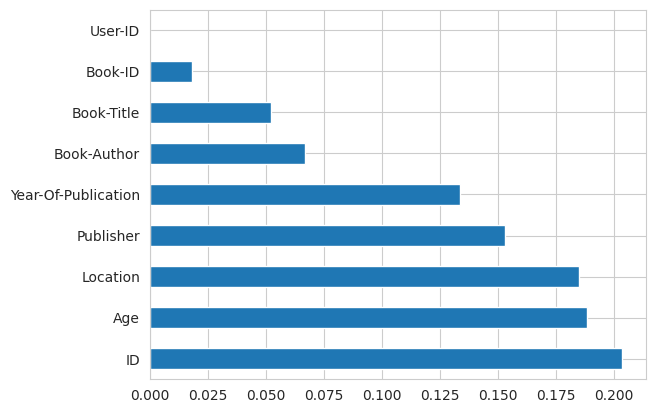

In [106]:
fi = pd.Series(model_xgb.feature_importances_)
fi.index = model_xgb.feature_names_in_
fi.nlargest(20).plot.barh()

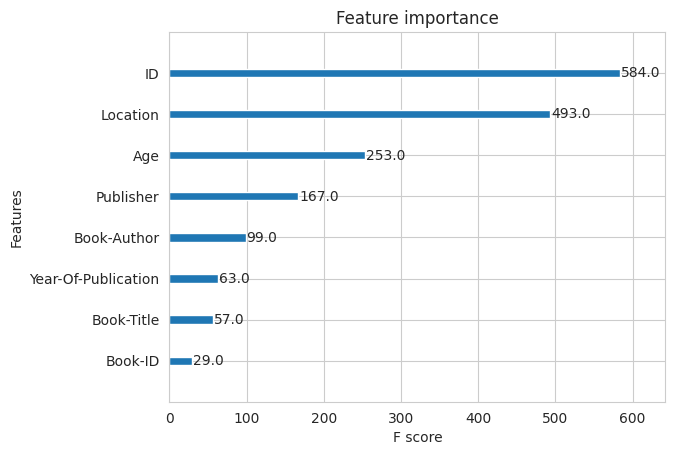

In [107]:
# model_xgb.plot_importance
xgb.plot_importance(model_xgb, max_num_features=20);

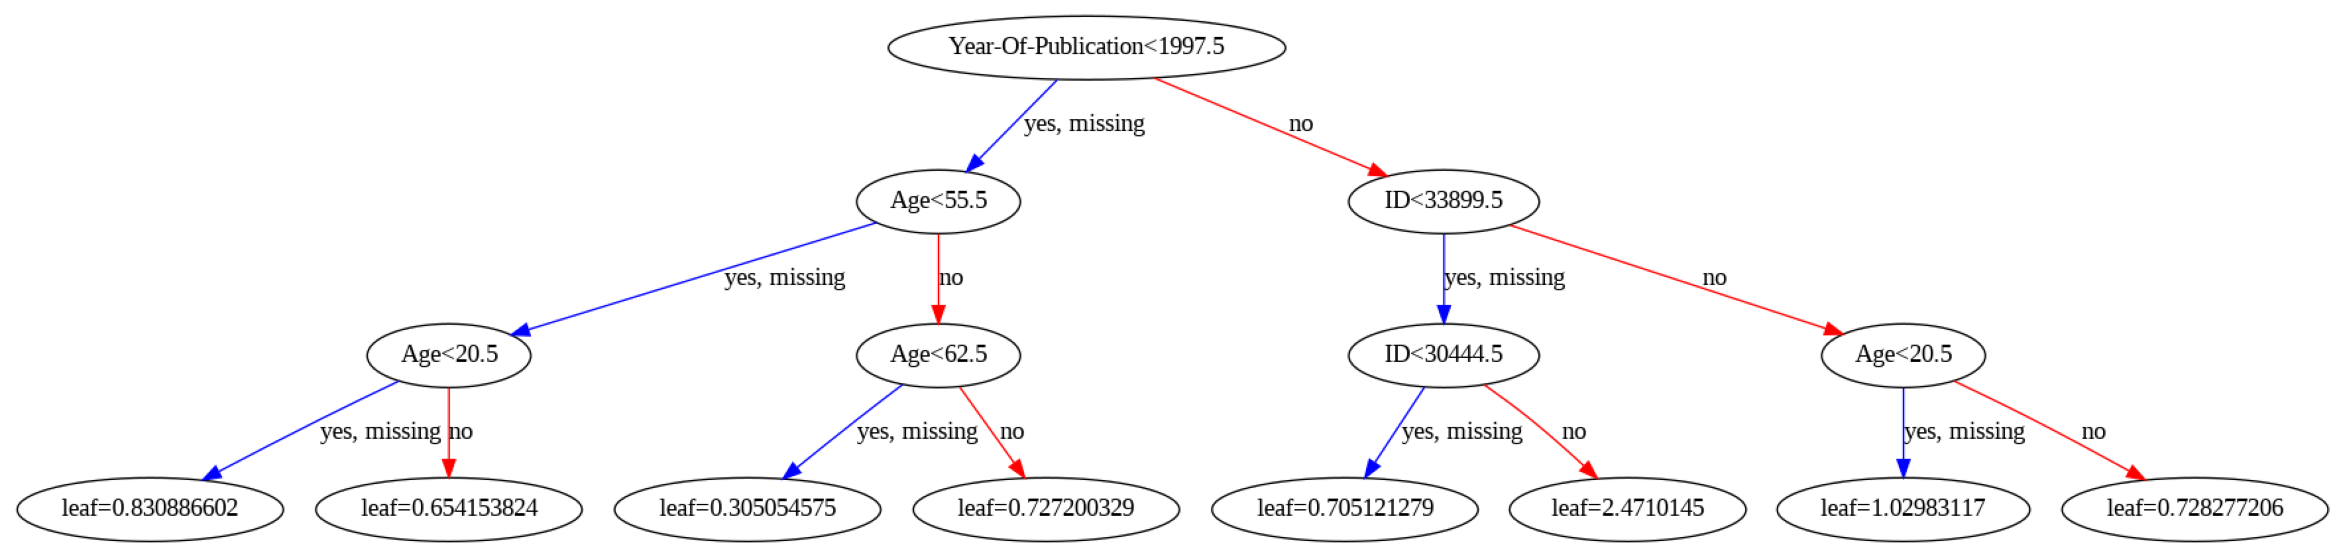

In [108]:
xgb.plot_tree(model_xgb, num_trees=0)
fig = plt.gcf()
fig.set_size_inches(30, 20)

In [109]:
from sklearn.metrics import r2_score
r2_score(y_valid, y_valid_predict)

0.11899803838576606

In [110]:
score_xgb = model_xgb.score(X_valid, y_valid)
score_xgb

0.11899803838576606

In [111]:
X_test.shape

(159621, 9)

In [113]:
y_pred_xgb = model_xgb.predict(X_test)
y_pred_xgb

array([3.4353507, 3.176663 , 2.2979524, ..., 4.4287553, 5.980485 ,
       5.378351 ], dtype=float32)

In [114]:
df_submit = pd.read_csv(f"{base_path}/sample_submission.csv")
df_submit.head()

,ID,Book-Rating
0,TEST_000000,0
1,TEST_000001,0
2,TEST_000002,0
3,TEST_000003,0
4,TEST_000004,0


In [115]:
y_pred_xgb = y_pred_xgb[:len(df_submit)].round()
y_pred_xgb

array([3., 3., 2., ..., 4., 6., 5.], dtype=float32)

In [116]:
df_submit["Book-Rating"] = abs(y_pred_xgb)
df_submit.head(2)

,ID,Book-Rating
0,TEST_000000,3.0
1,TEST_000001,3.0


In [117]:
file_name = f"{base_path}/submit.csv"
file_name

'data/submit.csv'

In [122]:
df_submit.to_csv(file_name, index=False)

In [123]:
pd.read_csv(file_name)

,ID,Book-Rating
0,TEST_000000,3.0
1,TEST_000001,3.0
2,TEST_000002,2.0
3,TEST_000003,3.0
4,TEST_000004,3.0
...,...,...
159616,TEST_159616,6.0
159617,TEST_159617,6.0
159618,TEST_159618,4.0
159619,TEST_159619,6.0


In [124]:
from google.colab import files
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Decision Tree + xgboost

In [134]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [164]:
tree_model = DecisionTreeClassifier()
xgb_model = XGBClassifier()

In [165]:
voting_model = VotingClassifier(estimators=[('tree', tree_model), ('xgb', xgb_model)], voting='hard')


In [166]:
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('tree', DecisionTreeClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))])

In [167]:
y_pred = voting_model.predict(X_test)

In [172]:
rmse_tf_xg = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"rmse_tf_xg: {rmse_tf_xg}")

rmse_tf_xg: 4.686224381869224


## 결정트리랑 텐서플로우

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [173]:
tree_model = DecisionTreeClassifier()

In [174]:
import tensorflow as tf
tf.model = tf.keras.Sequential([
    # tf.keras.layers.BatchNormalization(input_shape=X_train.iloc[0].shape),
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=X_train.iloc[0].shape),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=64),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1)
])

In [175]:
voting_model_tt = VotingClassifier(estimators=[('tree', tree_model), ('tensorflow', xgb_model)], voting='hard')

In [176]:
voting_model_tt.fit(X_train, y_train)

VotingClassifier(estimators=[('tree', DecisionTreeClassifier()),
                             ('tensorflow',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))])

In [178]:
y_pred_tt = voting_model_tt.predict(X_test)

In [179]:
rmse_tt = np.sqrt(mean_squared_error(y_test, y_pred_tt))
print(f"rmse_tt: {rmse_tt}")

rmse_tt: 4.685774587644766


## 랜덤포레스트 + xgboost

In [143]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [153]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [154]:
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [155]:
 rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)

In [156]:
ensemble_pred = (rf_pred + xgb_pred) / 2

In [157]:
rmse = np.sqrt(mean_squared_error(y_test, ensemble_pred))
print(f"Ensemble RMSE: {rmse}")

Ensemble RMSE: 3.442358268797963


In [182]:
ensemble_pred = ensemble_pred[:len(df_submit)]
ensemble_pred

array([3.6462507 , 4.77031285, 2.05325943, ..., 3.49324978, 3.72381702,
       4.34021235])

In [183]:
df_submit["Book-Rating"] = abs(ensemble_pred)
df_submit.head(2)

,ID,Book-Rating
0,TEST_000000,3.646251
1,TEST_000001,4.770313


In [185]:
file_name = f"{base_path}/ensemble_rf_xgb.csv"
file_name

'data/ensemble_rf_xgb.csv'

In [186]:
df_submit.to_csv(file_name, index=False)

In [187]:
pd.read_csv(file_name)

,ID,Book-Rating
0,TEST_000000,3.646251
1,TEST_000001,4.770313
2,TEST_000002,2.053259
3,TEST_000003,0.579257
4,TEST_000004,4.581858
...,...,...
159616,TEST_159616,0.683517
159617,TEST_159617,6.818579
159618,TEST_159618,3.493250
159619,TEST_159619,3.723817


In [188]:
from google.colab import files
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>